## 1. Download Data

In [1]:
import pandas as pd
from pandas.tseries.offsets import YearEnd

In [2]:
def load_deepsearch_data(filepath, column):
    df = pd.read_excel(filepath)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df.columns = [column]
    
    return df
    

In [3]:
# deepsearch data loading
df_xr = load_deepsearch_data('./proj_data/krw_cad_xr.xlsx', 'KRW/CAD')


In [4]:
df_monthly = df_xr.resample('M').last()

In [5]:
# set data after 2008 financial crisis
df_monthly = df_monthly.loc['2009-01-01':]

In [6]:
df_monthly.head()

,KRW/CAD
date,
2009-01-31,1116.50
2009-02-28,1209.49
2009-03-31,1091.38
2009-04-30,1119.83
2009-05-31,1141.41


### load whole data

In [7]:
def load_world_bank_data(filepath, column, nation):
    df = pd.read_excel(filepath, sheet_name = 'Data', skiprows = 3)
    df = df.set_index('Country Code')
    df = df.loc[nation].to_frame()
    
    df = df.iloc[3:]
    df.dropna(inplace=True)
    df[nation] = df[nation].astype(float)
    df['date'] = pd.to_datetime(df.index)+YearEnd(0)
    df.set_index('date', inplace=True)
    df.columns = [column]
    return df
      
    

In [8]:
df_real_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real XR', 'KOR')

In [9]:
df_real_can_xr = load_world_bank_data('./proj_data/world_real_xr.xls', 'Real CAN XR', 'CAN')

In [10]:
df_ppp_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'PPP XR', 'KOR')

In [11]:
df_ppp_can_xr = load_world_bank_data('./proj_data/world_ppp_xr.xls', 'CAN PPP XR', 'CAN')

In [12]:
df_ppp_xr.tail()

,PPP XR
date,
2016-12-31,858.809687
2017-12-31,872.624771
2018-12-31,854.871397
2019-12-31,864.630567
2020-12-31,824.604924


### ppp dataset merge

In [13]:
df_ppp_merge = df_ppp_xr.join(df_ppp_can_xr)

In [14]:
df_ppp_merge.head()

,PPP XR,CAN PPP XR
date,,
1990-12-31,559.920181,1.241556
1991-12-31,591.112647,1.237590
1992-12-31,622.893976,1.227694
1993-12-31,646.528116,1.214689
1994-12-31,684.657732,1.206599


### ppp calculate

$$
    \text{ppp calculate} = \frac{\frac{{P(KRW)}}{P(USD)}} {\frac{{P(CAN)}}{P(USD)}} = \frac{{P(KRW)}}{P(CAN)}
$$

In [15]:
df_ppp_merge['CALC_PPP_XR'] = df_ppp_merge['CAN PPP XR']*df_ppp_merge['PPP XR']

In [16]:
df_ppp_merge['CALC_PPP_XR']

date
1990-12-31     695.172260
1991-12-31     731.555101
1992-12-31     764.723197
1993-12-31     785.330591
1994-12-31     826.107335
1995-12-31     867.292429
1996-12-31     885.960927
1997-12-31     900.673522
1998-12-31     918.483841
1999-12-31     898.934098
2000-12-31     917.920941
2001-12-31     923.524052
2002-12-31     946.305864
2003-12-31     969.899783
2004-12-31     979.610731
2005-12-31     957.468188
2006-12-31     930.802333
2007-12-31     933.419896
2008-12-31     969.882301
2009-12-31     995.963994
2010-12-31    1027.540481
2011-12-31    1059.604256
2012-12-31    1063.998678
2013-12-31    1063.755661
2014-12-31    1072.722203
2015-12-31    1070.175281
2016-12-31    1036.621939
2017-12-31    1057.886500
2018-12-31    1031.422857
2019-12-31    1078.062029
2020-12-31    1027.228495
Name: CALC_PPP_XR, dtype: float64

In [17]:
df_ppp_merge[['CALC_PPP_XR']]

,CALC_PPP_XR
date,
1990-12-31,695.172260
1991-12-31,731.555101
1992-12-31,764.723197
1993-12-31,785.330591
1994-12-31,826.107335
1995-12-31,867.292429
1996-12-31,885.960927
1997-12-31,900.673522
1998-12-31,918.483841


### real xr dataset merge

In [18]:
# real xr dataset merge
df_real_xr_merged = df_real_xr.join(df_real_can_xr)

In [19]:
df_real_xr_merged.head()

,Real XR,Real CAN XR
date,,
1990-12-31,0.791116,1.064069
1991-12-31,0.806044,1.080204
1992-12-31,0.797917,1.015714
1993-12-31,0.805472,0.941546
1994-12-31,0.852147,0.883567


### real xr calculate

In [20]:
df_real_xr_merged['CALC_REAL_XR'] = df_real_xr_merged['Real XR']/df_real_xr_merged['Real CAN XR']

In [21]:
df_real_xr_merged.tail()

,Real XR,Real CAN XR,CALC_REAL_XR
date,,,
2016-12-31,0.740077,0.910555,0.812776
2017-12-31,0.771944,0.934025,0.826471
2018-12-31,0.776803,0.931108,0.834278
2019-12-31,0.741944,0.939745,0.789517
2020-12-31,0.698660,0.928844,0.752182


### Merge dataframes

In [22]:
df_merged= df_monthly.join(df_ppp_merge['CALC_PPP_XR'])


In [23]:
df_merged['CALC_PPP_XR'] = df_merged['CALC_PPP_XR'].fillna(method='ffill')

In [24]:
df_merged.head()

,KRW/CAD,CALC_PPP_XR
date,,
2009-01-31,1116.50,NaN
2009-02-28,1209.49,NaN
2009-03-31,1091.38,NaN
2009-04-30,1119.83,NaN
2009-05-31,1141.41,NaN


In [25]:
df_merged= df_merged.join(df_real_xr_merged['CALC_REAL_XR']) 

In [26]:
df_merged['CALC_REAL_XR'] = df_merged['CALC_REAL_XR'].fillna(method='ffill')

In [27]:
df_merged.head()

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR
date,,,
2009-01-31,1116.50,NaN,NaN
2009-02-28,1209.49,NaN,NaN
2009-03-31,1091.38,NaN,NaN
2009-04-30,1119.83,NaN,NaN
2009-05-31,1141.41,NaN,NaN


### Calculate New Real Xr

$$
    \text{Real XR} = \frac{S^{PPP}}{S}
$$

In [28]:
## New Real XR calculate
### ppp/market exchange rate
df_merged['New Real XR'] = \
    df_merged['CALC_PPP_XR']/df_merged['KRW/CAD']


In [29]:
df_merged

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR,New Real XR
date,,,,
2009-01-31,1116.50,NaN,NaN,NaN
2009-02-28,1209.49,NaN,NaN,NaN
2009-03-31,1091.38,NaN,NaN,NaN
2009-04-30,1119.83,NaN,NaN,NaN
2009-05-31,1141.41,NaN,NaN,NaN
...,...,...,...,...
2021-12-31,930.61,1027.228495,0.752182,1.103823
2022-01-31,944.10,1027.228495,0.752182,1.088051
2022-02-28,942.96,1027.228495,0.752182,1.089366


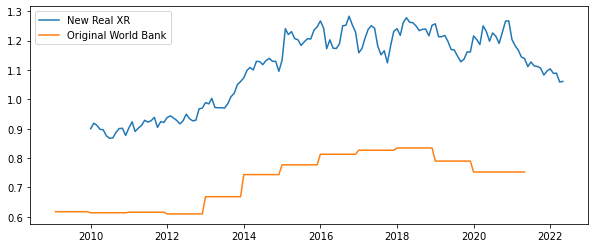

In [30]:
# let's draw a gragh with New Real XR and Original World Bank data
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)

plt.plot(df_merged['New Real XR'], label = 'New Real XR')
plt.plot(df_merged['CALC_REAL_XR'].shift(-12), label = 'Original World Bank')
plt.legend()
plt.show()

### Compute annual returns in the currency market

In [31]:
df_merged['ann_ret'] = \
    df_merged['KRW/CAD'].pct_change(periods=12)*100

In [32]:
df_merged['F12.ann_ret'] = \
    df_merged['ann_ret'].shift(-12)

In [33]:
df_merged.head(15)

,KRW/CAD,CALC_PPP_XR,CALC_REAL_XR,New Real XR,ann_ret,F12.ann_ret
date,,,,,,
2009-01-31,1116.50,NaN,NaN,NaN,NaN,-2.899239
2009-02-28,1209.49,NaN,NaN,NaN,NaN,-9.679286
2009-03-31,1091.38,NaN,NaN,NaN,NaN,1.670362
2009-04-30,1119.83,NaN,NaN,NaN,NaN,-0.763509
2009-05-31,1141.41,NaN,NaN,NaN,NaN,-0.311895
2009-06-30,1110.76,NaN,NaN,NaN,NaN,3.408477
2009-07-31,1144.11,NaN,NaN,NaN,NaN,0.237739
2009-08-31,1137.52,NaN,NaN,NaN,NaN,-1.391624
2009-09-30,1096.18,NaN,NaN,NaN,NaN,0.910434


### Use OLS!!!

In [34]:
import statsmodels.api as sm

In [35]:
df = df_merged[['New Real XR', 'F12.ann_ret']]
df = df.dropna()

In [36]:
X_data = df['New Real XR']
X = sm.add_constant(X_data)

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [37]:
Y = df['F12.ann_ret']

In [38]:
model = sm.OLS(Y,X)

In [39]:
results = model.fit()

In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     22.10
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.30e-06
Time:                        20:45:00   Log-Likelihood:                -420.57
No. Observations:                 137   AIC:                             845.1
Df Residuals:                     135   BIC:                             851.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -18.8659      3.750     -5.031      0.000     -26.282     -11.449
New Real XR    15.8298      3.367      4.701      0.000       9.171      22.489
==============================================================================
Omnibus:                       10.005   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.036
Skew:                          -0.074   Prob(JB):                        0.133
Kurtosis:                       2.172   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Forecast XR

$$
y = \alpha + \beta x
$$

$$
\text{ret}_{t, t+12} = \alpha + \beta \, \text{Real XR}_t +\epsilon
$$

In [41]:
results.params

const         -18.865880
New Real XR    15.829845
dtype: float64

In [42]:
results.params

const         -18.865880
New Real XR    15.829845
dtype: float64

In [43]:
last_obs = df_merged.iloc[-1]

In [44]:
last_xr = last_obs['KRW/CAD']
last_year_xr = last_obs['New Real XR']

In [45]:
last_xr

968.06

In [46]:
last_year_xr

1.0611206899728614

### method 1: simple , straightfoward, stupid

In [47]:
alpha = results.params['const']
beta = results.params['New Real XR']

In [48]:
alpha+beta*last_year_xr

-2.068503885166411

### method 2: numpy 

In [49]:
import numpy as np

In [50]:
exog = [1, last_year_xr]

In [51]:
np.dot(results.params, exog)

-2.068503885166411

### method 3: predict

In [52]:
results.predict(exog = exog)

array([-2.06850389])

In [53]:
help(results.predict)

Help on method predict in module statsmodels.base.model:

predict(exog=None, transform=True, *args, **kwargs) method of statsmodels.regression.linear_model.OLSResults instance
    Call self.model.predict with self.params as the first argument.
    
    Parameters
    ----------
    exog : array_like, optional
        The values for which you want to predict. see Notes below.
    transform : bool, optional
        If the model was fit via a formula, do you want to pass
        exog through the formula. Default is True. E.g., if you fit
        a model y ~ log(x1) + log(x2), and transform is True, then
        you can pass a data structure that contains x1 and x2 in
        their original form. Otherwise, you'd need to log the data
        first.
    *args
        Additional arguments to pass to the model, see the
        predict method of the model for the details.
    **kwargs
        Additional keywords arguments to pass to the model, see the
        predict method of the model for th

### confidence interval of our predictions

In [54]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [55]:
wls_prediction_std(results, exog = exog, alpha=0.05)

# alpha 0.05 >> 95% ...,,,,,,,,...

# predicted stdev, interval - lower, interval - upper 

(array([5.27136671]), array([-12.49364511]), array([8.35663734]))

In [56]:
type(exog)

list

In [57]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.2f} % ~ {:.2f}%'.format( alpha, iv_l[0], iv_u[0]))

Confidence interval at alpha 0.05 : -12.49 % ~ 8.36%
Confidence interval at alpha 0.25 : -8.16 % ~ 4.02%
Confidence interval at alpha 0.50 : -5.63 % ~ 1.50%


In [58]:
pred_ret = results.predict(exog = exog )

In [59]:
last_xr * (1+pred_ret[0]/100)

948.035641289258

In [60]:
last_xr

968.06

In [61]:
for alpha in [.05, .25, .50]:
    prstd, iv_l, iv_u = wls_prediction_std(results, exog = exog, alpha=alpha)
    
    print('Confidence interval at alpha {:.2f} : {:.0f}  ~ {:.0f}'.format( alpha, last_xr*(1+iv_l[0]/100), last_xr*(1+iv_u[0]/100)))

Confidence interval at alpha 0.05 : 847  ~ 1049
Confidence interval at alpha 0.25 : 889  ~ 1007
Confidence interval at alpha 0.50 : 914  ~ 983
